In [2]:
import numpy as np
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

In [4]:
!curl $url -o data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1390k  100 1390k    0     0  3166k      0 --:--:-- --:--:-- --:--:-- 3181k


In [5]:
data = pd.read_csv("data.csv")

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
target = "median_house_value"

In [9]:
features = [
'longitude',
'latitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income']

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

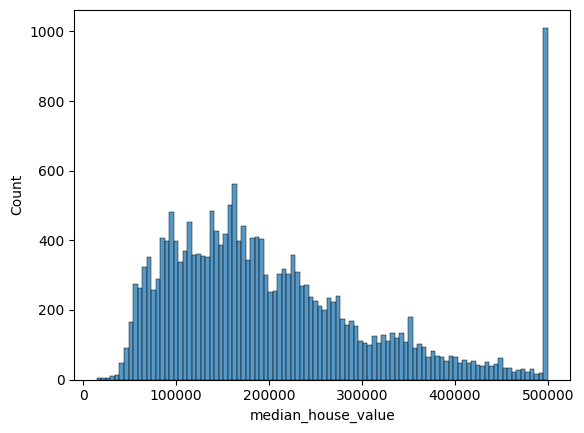

In [10]:
sns.histplot(data[target], bins = 100)

In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
np.random.seed(42)
length = data.shape[0]
index = np.arange(0, length)
np.random.shuffle(index)

data_shuffled = data.iloc[index]

split_train = 0.6
split_val = 0.2
split_test = 0.2
n_val = int(split_val *  length)
n_test = int(split_test * length)
n_train = length - n_val - n_test
data_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [14]:
data_features = data_shuffled[features].copy()

In [15]:
data_target = data_shuffled[target].copy()

In [16]:
def split(df):
    df_train = df.iloc[:n_train].copy().reset_index(drop=True)
    df_val = df.iloc[n_train: n_train + n_val].copy().reset_index(drop=True)
    df_test = df.iloc[n_train + n_val:].copy().reset_index(drop=True)
    return df_train, df_val, df_test

In [17]:
data_target_log = np.log1p(data_target)

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

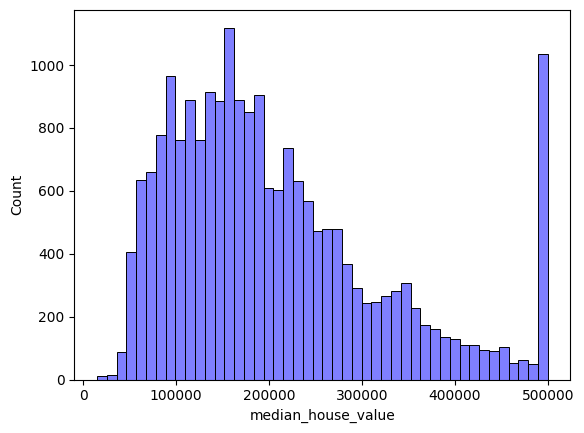

In [27]:
sns.histplot(data_target, color='blue', alpha=0.5)

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

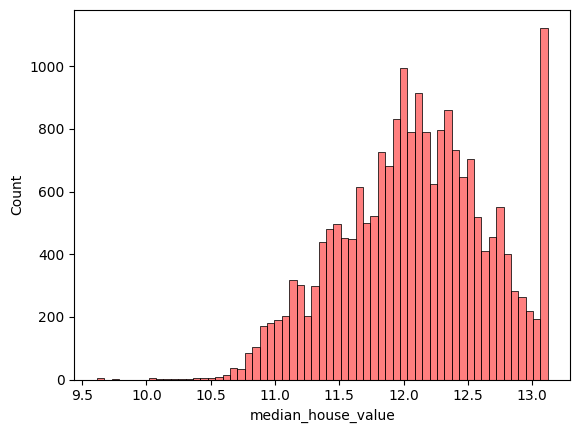

In [26]:
sns.histplot(data_target_log, color='red', alpha=0.5)

In [573]:
def preprocess(df, fillzeros, fillmean):
    df = df.copy()
    for column in fillzeros:
        df[column] = df[column].fillna(0)    
    for column in fillmean:
        df[column] = df[column].fillna(df[column].mean())
    return df.values

In [554]:
df_train, df_val, df_test = split(data_features)
df_y_train, df_y_val, df_y_test = split(data_target_log)

In [555]:
y_train = df_y_train.values
y_val = df_y_val.values
y_test = df_y_test.values

In [556]:
X_train = preprocess(df_train, [], ['total_bedrooms'])
X_val = preprocess(df_val, [], ['total_bedrooms'])
X_test = preprocess(df_test, [], ['total_bedrooms'])

In [557]:
X_train

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [558]:
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [559]:
def fit(X, y):
    X = np.column_stack([np.ones(X.shape[0]), X]) # Add x0
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [560]:
def linear_regression(X, w):
    return np.column_stack([np.ones(X.shape[0]), X]).dot(w)

In [561]:
def rmse(x,y):
    return np.sqrt(np.mean((x-y)**2))

In [562]:
W = fit (X_train, y_train)

In [563]:
y_pred = linear_regression(X_val, W)

In [564]:
rmse(y_pred, y_val)

0.3290195439006425

In [565]:
X_train = preprocess(df_train, ['total_bedrooms'], [])
X_val = preprocess(df_val, ['total_bedrooms'], [])
X_test = preprocess(df_test, ['total_bedrooms'], [])

In [566]:
W = fit (X_train, y_train)
y_pred = linear_regression(X_val, W)
rmse(y_pred, y_val)

0.32953303652307936

In [567]:
X_train

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [568]:
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [569]:
def fit(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) # Add x0
    XTX = X.T.dot(X)
    return np.linalg.inv(XTX + r * np.eye(XTX.shape[0])).dot(X.T).dot(y)

In [570]:
W.shape

(9,)

In [581]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    W = fit(X_train, y_train, r)
    y_pred = linear_regression(X_val, W)
    print(f'r= {r:.8f}, rmse= {round(rmse(y_pred, y_val),2)}')

r= 0.00000000, rmse= 0.34
r= 0.00000100, rmse= 0.34
r= 0.00010000, rmse= 0.34
r= 0.00100000, rmse= 0.34
r= 0.01000000, rmse= 0.34
r= 0.10000000, rmse= 0.34
r= 1.00000000, rmse= 0.34
r= 5.00000000, rmse= 0.34
r= 10.00000000, rmse= 0.35


In [588]:
results = []
for state in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(state)
    index = np.arange(0, length)
    np.random.shuffle(index)
    data_shuffled = data.iloc[index]
    data_features = data_shuffled[features].copy()
    data_target = data_shuffled[target].copy()
    data_target_log = np.log1p(data_target)
    df_train, df_val, df_test = split(data_features)
    df_y_train, df_y_val, df_y_test = split(data_target_log)
    y_train = df_y_train.values
    y_val = df_y_val.values
    y_test = df_y_test.values
    X_train = preprocess(df_train, ['total_bedrooms'], [])
    X_val = preprocess(df_val, ['total_bedrooms'], [])
    X_test = preprocess(df_test, ['total_bedrooms'], [])
    W = fit(X_train, y_train)
    y_pred = linear_regression(X_val, W)
    rmse_val = rmse(y_pred, y_val)
    print(f'state = {state:2d}, w0 = {W[0]} rmse= {round(rmse_val,3)}')
    results.append(rmse_val)
print(np.array(results).std())
    

state =  0, w0 = -11.900382139152798 rmse= 0.339
state =  1, w0 = -11.732757373716751 rmse= 0.336
state =  2, w0 = -11.806729361591414 rmse= 0.332
state =  3, w0 = -11.587900348571472 rmse= 0.341
state =  4, w0 = -11.389470588981697 rmse= 0.339
state =  5, w0 = -11.447114276602365 rmse= 0.343
state =  6, w0 = -11.370516352746764 rmse= 0.345
state =  7, w0 = -12.473448918641331 rmse= 0.34
state =  8, w0 = -11.800287429879015 rmse= 0.347
state =  9, w0 = -11.459046830536993 rmse= 0.337
0.004170771947026757


In [592]:
X_val

array([[-1.1766e+02,  3.4030e+01,  1.4000e+01, ...,  1.1510e+03,
         3.5200e+02,  5.7530e+00],
       [-1.2409e+02,  4.0880e+01,  3.1000e+01, ...,  1.0520e+03,
         4.6700e+02,  1.5326e+00],
       [-1.2157e+02,  3.7020e+01,  1.7000e+01, ...,  2.6810e+03,
         6.0800e+02,  2.9417e+00],
       ...,
       [-1.1813e+02,  3.3930e+01,  3.4000e+01, ...,  1.5780e+03,
         4.8800e+02,  3.1496e+00],
       [-1.1837e+02,  3.4110e+01,  4.2000e+01, ...,  1.8630e+03,
         9.5700e+02,  8.5842e+00],
       [-1.1837e+02,  3.4080e+01,  5.2000e+01, ...,  5.4300e+02,
         2.1300e+02,  6.0338e+00]])

In [597]:
np.random.seed(9)
index = np.arange(0, length)
np.random.shuffle(index)
data_shuffled = data.iloc[index]
data_features = data_shuffled[features].copy()
data_target = data_shuffled[target].copy()
data_target_log = np.log1p(data_target)
df_train, df_val, df_test = split(data_features)
df_y_train, df_y_val, df_y_test = split(data_target_log)
y_train = df_y_train.values
y_val = df_y_val.values
y_test = df_y_test.values
X_train = preprocess(df_train, ['total_bedrooms'], [])
X_val = preprocess(df_val, ['total_bedrooms'], [])
X_test = preprocess(df_test, ['total_bedrooms'], [])
X_train_full = np.concatenate([X_train, X_val])
y_train_full = np.concatenate([y_train, y_val])
W = fit(X_train_full, y_train_full)
y_pred = linear_regression(X_test, W)
rmse_val = rmse(y_pred, y_test)
print(f'state = 9, w0 = {W[0]} rmse= {round(rmse_val,3)}')

state = 9, w0 = -11.419659426533292 rmse= 0.345


In [593]:
X_train.shape

(12384, 8)

In [595]:
X_val.shape

(4128, 8)